In [1]:
import numpy as np, pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
def sistema_frances(monto, interes, q_cuotas):
    valor_cuota = monto * ((((1+interes)**q_cuotas) * interes) / (((1+interes)**q_cuotas)-1))
    lista_periodos = [i for i in range(1,(q_cuotas+1))]
    lista_cuotas = [valor_cuota] * q_cuotas
    lista_saldo_deuda = [monto]
    lista_intereses = []
    lista_amortizaciones = []
    for i in range(q_cuotas):
        interes_por_cuota = lista_saldo_deuda[i] * interes
        lista_intereses.append(interes_por_cuota)
        amort_capital_por_cuota = lista_cuotas[i] - lista_intereses[i]
        lista_amortizaciones.append(amort_capital_por_cuota)
        saldo_deuda = lista_saldo_deuda[i] - lista_amortizaciones[i]
        lista_saldo_deuda.append(saldo_deuda)
    lista_saldo_deuda.pop(-1)
    
    data = {"Período (k)":lista_periodos, "Saldo de Deuda (k-1 cuotas abonadas)": lista_saldo_deuda, "Cuota (k)": lista_cuotas, "C(i,k)": lista_intereses, \
           "C(V,k)": lista_amortizaciones}
    df = pd.DataFrame(data = data)
    info_grafico = ["Cuota (k)", "C(i,k)", "C(V,k)"]
    for i in range(len(info_grafico)):
        plt.plot(df[info_grafico[i]], label = info_grafico[i])
    plt.xticks(list(range(0,q_cuotas)),lista_periodos)
    plt.xlabel("Período", color = "black", size = 15)
    plt.ylabel("Importe", color = "black", size=15 )
    plt.legend(loc = "upper left", bbox_to_anchor = (1,1))
    plt.title("Componente de las Cuotas", size = 25, color = "black")
    plt.show()
    return df
    

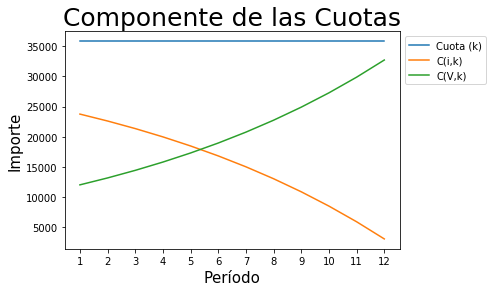

,Período (k),Saldo de Deuda (k-1 cuotas abonadas),Cuota (k),"C(i,k)","C(V,k)"
0,1,250000.000000,35796.928559,23750.000000,12046.928559
1,2,237953.071441,35796.928559,22605.541787,13191.386772
2,3,224761.684669,35796.928559,21352.360044,14444.568515
3,4,210317.116154,35796.928559,19980.126035,15816.802524
4,5,194500.313630,35796.928559,18477.529795,17319.398764
5,6,177180.914866,35796.928559,16832.186912,18964.741646
6,7,158216.173220,35796.928559,15030.536456,20766.392103
7,8,137449.781117,35796.928559,13057.729206,22739.199353
8,9,114710.581764,35796.928559,10897.505268,24899.423291
9,10,89811.158473,35796.928559,8532.060055,27264.868504


In [4]:
sistema_frances(monto = 250000, interes = 0.095, q_cuotas = 12)

In [5]:
def sistema_aleman(monto, interes, q_cuotas):
    valor_amortizacion = monto / q_cuotas
    lista_amortizaciones = [valor_amortizacion] * q_cuotas
    lista_periodos = [i for i in range(1,(q_cuotas+1))]
    lista_cuotas = []
    lista_intereses = []
    lista_saldo_deuda = [monto]
    for i in range(q_cuotas):
        interes_por_cuota = lista_saldo_deuda[i] * interes
        lista_intereses.append(interes_por_cuota)
        cuota = interes_por_cuota + lista_amortizaciones[i]
        lista_cuotas.append(cuota)
        saldo_deuda = lista_saldo_deuda[i] - lista_amortizaciones[i]
        lista_saldo_deuda.append(saldo_deuda)
    lista_saldo_deuda.pop(-1)
    
    data = {"Período (k)":lista_periodos, "Saldo de Deuda (k-1 cuotas abonadas)": lista_saldo_deuda, "Cuota (k)": lista_cuotas, "C(i,k)": lista_intereses, \
           "C(V,k)": lista_amortizaciones}
    df = pd.DataFrame(data = data)
    info_grafico = ["Cuota (k)", "C(i,k)", "C(V,k)"]
    for i in range(len(info_grafico)):
        plt.plot(df[info_grafico[i]], label = info_grafico[i])
    plt.xticks(list(range(0,q_cuotas)),lista_periodos)
    plt.xlabel("Período", color = "black", size = 15)
    plt.ylabel("Importe", color = "black", size=15 )
    plt.legend(loc = "upper left", bbox_to_anchor = (1,1))
    plt.title("Componente de las Cuotas", size = 25, color = "black")
    plt.show()
    return df

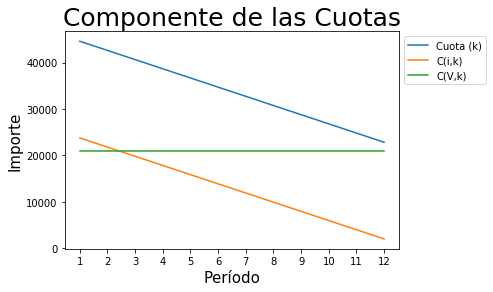

,Período (k),Saldo de Deuda (k-1 cuotas abonadas),Cuota (k),"C(i,k)","C(V,k)"
0,1,250000.000000,44583.333333,23750.000000,20833.333333
1,2,229166.666667,42604.166667,21770.833333,20833.333333
2,3,208333.333333,40625.000000,19791.666667,20833.333333
3,4,187500.000000,38645.833333,17812.500000,20833.333333
4,5,166666.666667,36666.666667,15833.333333,20833.333333
5,6,145833.333333,34687.500000,13854.166667,20833.333333
6,7,125000.000000,32708.333333,11875.000000,20833.333333
7,8,104166.666667,30729.166667,9895.833333,20833.333333
8,9,83333.333333,28750.000000,7916.666667,20833.333333
9,10,62500.000000,26770.833333,5937.500000,20833.333333


In [9]:
sistema_aleman(monto = 250000, interes = 0.095, q_cuotas = 12)